In [1]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# trainarea <- ext(c(-134, -128, 57, 60))

In [3]:
# loading climatologies

prism = xr.open_dataset('/home/sbeale/no_overlap/prec_03_PRISM_WorldClim.nc')
wrf = xr.open_dataset('/home/sbeale/no_overlap/prec_03_WRF_coarse.nc')
coast = xr.open_dataset('/home/sbeale/no_overlap/coast.nc')
dem = xr.open_dataset('/home/sbeale/no_overlap/DEM.nc')
lat = xr.open_dataset('/home/sbeale/no_overlap/lat.nc')
lon = xr.open_dataset('/home/sbeale/no_overlap/lon.nc')


In [4]:
prism_coarse = xr.open_dataset('/home/sbeale/no_overlap/prec_03_PRISM_coarse.nc')

In [5]:
wrf = wrf.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
prism = prism.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
prism_coarse = prism_coarse.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
dem = dem.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
lat = lat.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
lon = lon.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
coast = coast.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))

In [6]:
# selecting slice of upper BC for testing data
min_lon = -128
max_lon = -119
min_lat = 56
max_lat = 61
prism_test = prism.where((prism.latitude <= max_lat) & (prism.latitude >= min_lat) & (prism.longitude >= min_lon) & (prism.longitude <= max_lon), drop=True)
wrf_test = wrf.where((wrf.latitude <= max_lat) & (wrf.latitude >= min_lat) & (wrf.longitude >= min_lon) & (wrf.longitude <= max_lon), drop=True)

coast_test = coast.where((coast.latitude <= max_lat) & (coast.latitude >= min_lat) & (coast.longitude >= min_lon) & (coast.longitude <= max_lon), drop=True)
dem_test = dem.where((dem.latitude <= max_lat) & (dem.latitude >= min_lat) & (dem.longitude >= min_lon) & (dem.longitude <= max_lon), drop=True)
lat_test = lat.where((lat.latitude <= max_lat) & (lat.latitude >= min_lat) & (lat.longitude >= min_lon) & (lat.longitude <= max_lon), drop=True)
lon_test = lon.where((lon.latitude <= max_lat) & (lon.latitude >= min_lat) & (lon.longitude >= min_lon) & (lon.longitude <= max_lon), drop=True)

In [9]:
# replacing cropped values with NaN
prism['prec'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
wrf['prec'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan

coast['dist'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
dem['dem'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
lat['lat'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
lon['lon'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan

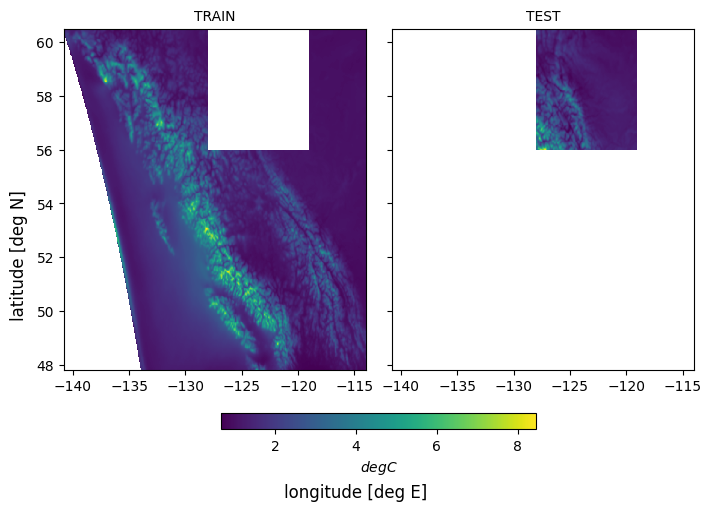

In [10]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(wrf.longitude, wrf.latitude, wrf.prec, cmap='viridis', label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(wrf_test.longitude, wrf_test.latitude, wrf_test.prec, cmap='viridis', label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [11]:
wrf_tens = torch.from_numpy(np.array(wrf.prec))
prism_tens = torch.from_numpy(np.array(prism.prec))
prism_coarse_tens = torch.from_numpy(np.array(prism_coarse.prec))
dem_tens = torch.from_numpy(np.array(dem.dem))
lat_tens = torch.from_numpy(np.array(lat.lat))
lon_tens = torch.from_numpy(np.array(lon.lon))
coast_tens = torch.from_numpy(np.array(coast.dist))

In [12]:
wrf_tens = wrf_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
dem_tens = dem_tens.where(np.isnan(prism_tens)==False, np.nan)
lat_tens = lat_tens.where(np.isnan(prism_tens)==False, np.nan)
lon_tens = lon_tens.where(np.isnan(prism_tens)==False, np.nan)
coast_tens = coast_tens.where(np.isnan(prism_tens)==False, np.nan)

/tmp/ipykernel_362215/2904706206.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  wrf_tens = wrf_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
/tmp/ipykernel_362215/2904706206.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dem_tens = dem_tens.where(np.isnan(prism_tens)==False, np.nan)
/tmp/ipykernel_362215/2904706206.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  lat_tens = lat_tens.where(np.isnan(prism_tens)==False, np.nan)
/tmp/ipykernel_362215/2904706206.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  lon_tens = lon_tens.where(np.isnan(prism_tens)==False, np.nan)
/tmp/ipykernel_362215/2904706206.

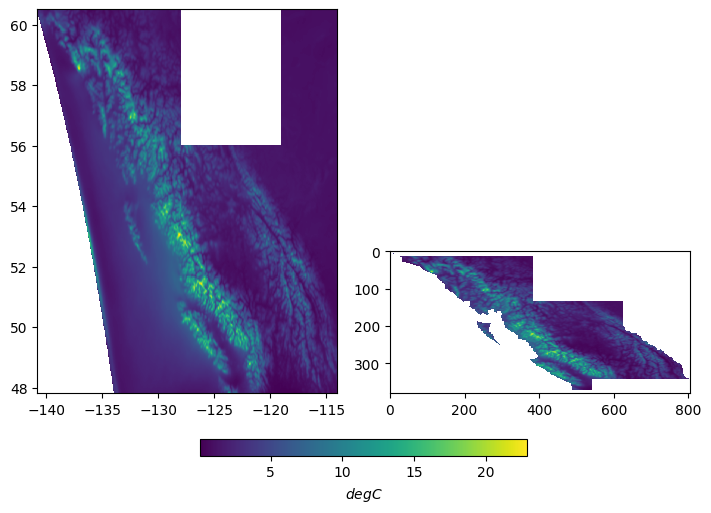

In [13]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5))

pc1 = ax[0].pcolormesh(wrf.longitude, wrf.latitude, wrf.prec, cmap='viridis', label=r'$m$')
pc2 = ax[1].imshow(wrf_tens, cmap='viridis', label=r'$m$')


fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [14]:
prism_prec = prism['prec']
wrf_prec = wrf['prec']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [15]:
# calculating mean 

prism_mean = np.nanmean(prism_tens)
wrf_mean = np.nanmean(wrf_tens)
coast_mean = np.nanmean(coast_tens)
dem_mean = np.nanmean(dem_tens)
lat_mean = np.nanmean(lat_tens)
lon_mean = np.nanmean(lon_tens)

In [16]:
# calculating standard deviation 

prism_std = np.nanstd(prism_tens)
wrf_std = np.nanstd(wrf_tens)
coast_std = np.nanstd(coast_tens)
dem_std = np.nanstd(dem_tens)
lat_std = np.nanstd(lat_tens)
lon_std = np.nanstd(lon_tens)

In [17]:
print(wrf_mean, wrf_std)

4.5581007 3.2217531


In [18]:
import csv 
# standardization is done based on mean and standard deviation of training data
# testing data is normalized using that mean and std
# data rows as dictionary objects 
mydict =[{'var': 'prec', 'month':3, 'clim': 'prism', 'mean': prism_mean, 'std':prism_std}, 
         {'var': 'prec', 'month':3, 'clim': 'wrf', 'mean': wrf_mean, 'std':wrf_std}, 
         {'var': 'dist from coast', 'month':3, 'clim': 'prism', 'mean':coast_mean, 'std':coast_std},
         {'var': 'dem', 'month':3, 'clim': 'prism', 'mean':dem_mean, 'std':dem_std},
         {'var': 'lat', 'month':3, 'clim': 'prism', 'mean':lat_mean, 'std':lat_std},
         {'var': 'lon', 'month':3, 'clim': 'prism', 'mean':lon_mean, 'std':lon_std},
         ]

# field names 
fields = ['var','month', 'clim', 'mean', 'std'] 

with open('/home/sbeale/prec_march_no_overlap_BC/standardization.csv', 'w', newline='') as file: 
    writer = csv.DictWriter(file, fieldnames = fields)

    writer.writeheader() 

    writer.writerows(mydict)

In [19]:
# standardizing all variables 
prism['prec'] = (prism_prec - prism_mean)/prism_std
wrf['prec'] = (wrf_prec - wrf_mean)/wrf_std
coast['dist'] = (coast_dist - coast_mean)/coast_std
dem['dem'] = (dem_dem - dem_mean)/dem_std
lat['lat'] = (lat_lat - lat_mean)/lat_std
lon['lon'] = (lon_lon - lon_mean)/lon_std

In [20]:
# standardizing all variables 
prism_prec = prism_test['prec']
wrf_prec = wrf_test['prec']
coast_dist = coast_test['dist']
dem_dem = dem_test['dem']
lat_lat = lat_test['lat']
lon_lon = lon_test['lon']

prism_test['prec'] = (prism_prec - prism_mean)/prism_std
wrf_test['prec'] = (wrf_prec - wrf_mean)/wrf_std
coast_test['dist'] = (coast_dist - coast_mean)/coast_std
dem_test['dem'] = (dem_dem - dem_mean)/dem_std
lat_test['lat'] = (lat_lat - lat_mean)/lat_std
lon_test['lon'] = (lon_lon - lon_mean)/lon_std

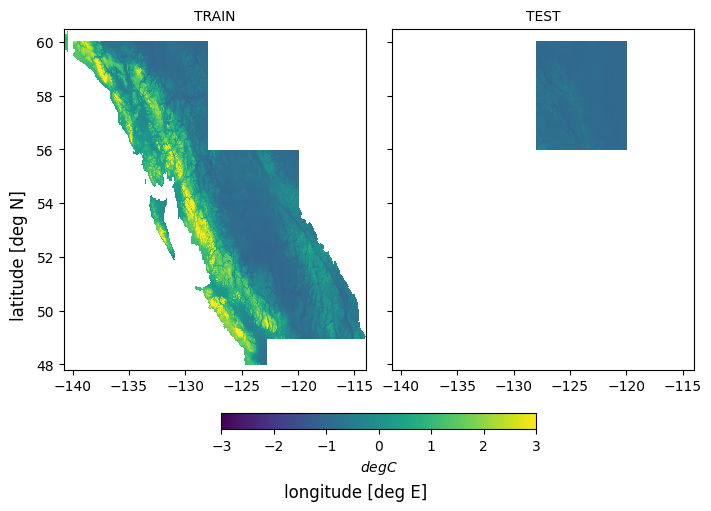

In [21]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.prec, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(prism_test.longitude, prism_test.latitude, prism_test.prec, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [22]:
prism.prec.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/prism_train.nc')
wrf.prec.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/wrf_train.nc')
dem.dem.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/dem_train.nc')
lat.lat.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/lat_train.nc')
lon.lon.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/lon_train.nc')
coast.dist.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/coast_train.nc')

In [23]:
prism_test.prec.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/prism_test.nc')
wrf_test.prec.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/wrf_test.nc')
dem_test.dem.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/dem_test.nc')
lat_test.lat.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/lat_test.nc')
lon_test.lon.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/lon_test.nc')
coast_test.dist.to_netcdf('/home/sbeale/prec_march_no_overlap_BC/coast_test.nc')

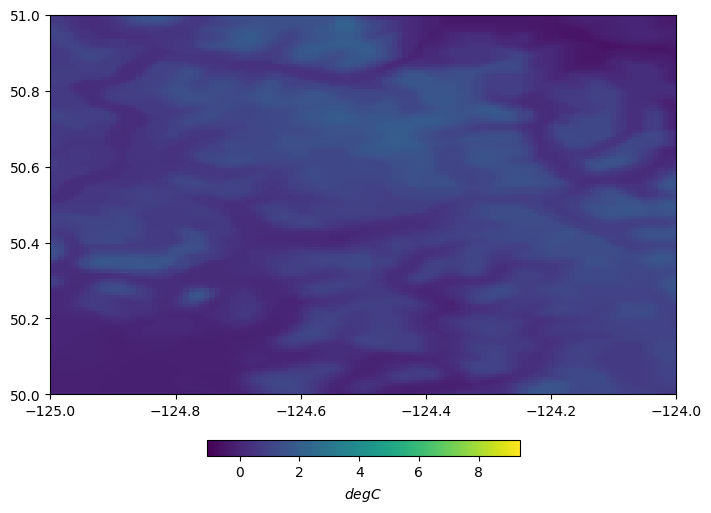

In [24]:
x = xr.open_dataset('/home/sbeale/prec_march_no_overlap_BC/prism_train.nc')

fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax.pcolormesh(x.longitude, x.latitude, x.prec, cmap='viridis', label=r'$m$')

ax.set_ylim(50,51)
ax.set_xlim(-125,-124)

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', label=r'$deg C$')

In [25]:
prism_pt = np.array(prism.prec)
wrf_pt = np.array(wrf.prec)
coast_pt = np.array(coast.dist)
dem_pt = np.array(dem.dem)
lat_pt = np.array(lat.lat)
lon_pt = np.array(lon.lon)

In [26]:
prism_test_pt = np.array(prism_test.prec)
wrf_test_pt = np.array(wrf_test.prec)
coast_test_pt = np.array(coast_test.dist)
dem_test_pt = np.array(dem_test.dem)
lat_test_pt = np.array(lat_test.lat)
lon_test_pt = np.array(lon_test.lon)

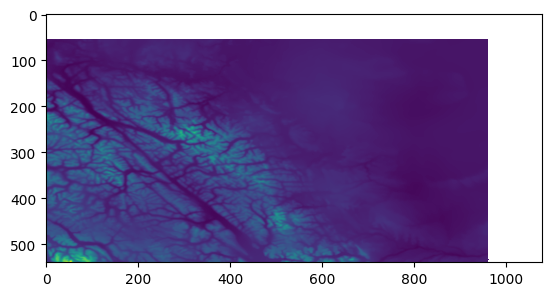

In [27]:
plt.imshow(prism_test_pt)

In [28]:
prism_pt.shape

(1524, 3216)

In [29]:
wrf_pt.shape

(381, 804)

In [30]:
x_fine = np.arange(0,prism_pt.shape[0]-128, 8)
y_fine = np.arange(0,prism_pt.shape[1]-128, 8)

x_coarse = np.arange(0,wrf_pt.shape[0]-32, 2)
y_coarse = np.arange(0,wrf_pt.shape[1]-32, 2)

In [31]:
x_fine_test= np.arange(0,prism_test_pt.shape[0]-128, 8)
y_fine_test = np.arange(0,prism_test_pt.shape[1]-128, 8)

x_coarse_test = np.arange(0,wrf_test_pt.shape[0]-32, 2)
y_coarse_test = np.arange(0,wrf_test_pt.shape[1]-32, 2)

In [32]:
tiles_fine_prism = []
tiles_fine_coast = []
tiles_fine_dem = []
tiles_fine_lat = []
tiles_fine_lon = []
for i in range(0, len(y_fine)):
    prism = prism_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_prism.append(prism[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon.append(lon[0+x_fine[j]:128+x_fine[j]])

In [33]:
len(tiles_fine_coast)

67550

In [34]:
tiles_fine_prism_test = []
tiles_fine_coast_test = []
tiles_fine_dem_test = []
tiles_fine_lat_test = []
tiles_fine_lon_test = []
for i in range(0, len(y_fine_test)):
    prism = prism_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    coast = coast_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    dem = dem_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    lat = lat_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    lon = lon_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    for j in range(0, len(x_fine_test)):
        tiles_fine_prism_test.append(prism[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_coast_test.append(coast[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_dem_test.append(dem[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_lat_test.append(lat[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_lon_test.append(lon[0+x_fine_test[j]:128+x_fine_test[j]])

In [35]:
tiles_coarse_wrf = []
for i in range(0, len(y_coarse)):
    wrf = wrf_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_wrf.append(wrf[0+x_coarse[j]:32+x_coarse[j]])

In [36]:
tiles_coarse_wrf_test = []
for i in range(0, len(y_coarse_test)):
    wrf = wrf_test_pt[:,0+y_coarse_test[i]:32+y_coarse_test[i]]
    for j in range(0, len(x_fine_test)):
        tiles_coarse_wrf_test.append(wrf[0+x_coarse_test[j]:32+x_coarse_test[j]])

In [37]:
# create for all covariates 
# wrf and HR 
# calculate which tiles have NAN values based on PRISM grid and then do the same to the other ones  
# throw out ones with all nan 


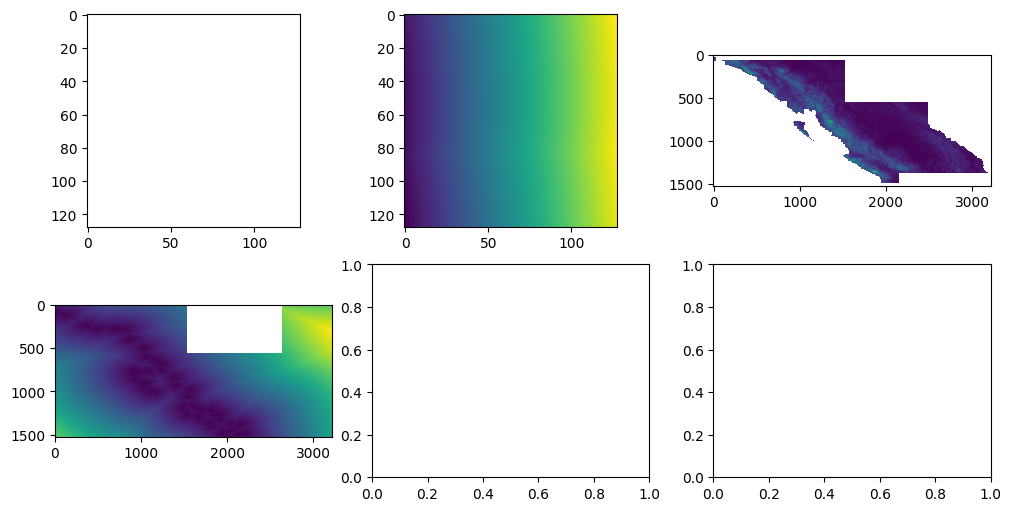

In [38]:
i = -1
fig, ax = plt.subplots(2, 3, layout='constrained', figsize=(10, 5))

pc1 = ax[0,0].imshow(tiles_fine_prism[i])

pc1 = ax[0,1].imshow(np.nan_to_num(tiles_fine_coast[i], nan=np.nanmean(tiles_fine_coast[i])))
pc3 = ax[0,2].imshow(prism_pt)
pc4 = ax[1,0].imshow(coast_pt)

In [39]:
size_fine = 128*128
size_coarse = 32*32

good_tiles_prism = []
good_tiles_dem = []
good_tiles_coast = []
good_tiles_lat = []
good_tiles_lon = []

good_tiles_wrf = []

for i in range(0, len(tiles_fine_prism)):
    ind = np.argwhere(np.isnan(tiles_fine_prism[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_wrf[i]))
    percent_nan_wrf = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_wrf==0)):
        good_tiles_prism.append(tiles_fine_prism[i])
        good_tiles_dem.append(tiles_fine_dem[i])
        good_tiles_coast.append(tiles_fine_coast[i])
        good_tiles_lat.append(tiles_fine_lat[i])
        good_tiles_lon.append(tiles_fine_lon[i])
        
        good_tiles_wrf.append(tiles_coarse_wrf[i])
    elif ((percent_nan_prism <= 25) & (percent_nan_wrf <= 25)):
        
        good_tiles_prism.append(np.nan_to_num(tiles_fine_prism[i], nan=np.nanmean(tiles_fine_prism[i])))
        
        good_tiles_wrf.append(np.nan_to_num(tiles_coarse_wrf[i], nan=np.nanmean(tiles_coarse_wrf[i])))
                
        good_tiles_dem.append(np.nan_to_num(tiles_fine_dem[i], nan=np.nanmean(tiles_fine_dem[i])))
        good_tiles_coast.append(np.nan_to_num(tiles_fine_coast[i], nan=np.nanmean(tiles_fine_coast[i])))
        good_tiles_lat.append(np.nan_to_num(tiles_fine_lat[i], nan=np.nanmean(tiles_fine_lat[i])))
        good_tiles_lon.append(np.nan_to_num(tiles_fine_lon[i], nan=np.nanmean(tiles_fine_lon[i])))

In [40]:
good_tiles_prism_test = []
good_tiles_dem_test = []
good_tiles_coast_test = []
good_tiles_lat_test = []
good_tiles_lon_test = []

good_tiles_wrf_test = []

for i in range(0, len(tiles_fine_prism_test)):
    ind = np.argwhere(np.isnan(tiles_fine_prism_test[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_wrf_test[i]))
    percent_nan_wrf = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_wrf==0)):
        good_tiles_prism_test.append(tiles_fine_prism_test[i])
        good_tiles_dem_test.append(tiles_fine_dem_test[i])
        good_tiles_coast_test.append(tiles_fine_coast_test[i])
        good_tiles_lat_test.append(tiles_fine_lat_test[i])
        good_tiles_lon_test.append(tiles_fine_lon_test[i])
        
        good_tiles_wrf_test.append(tiles_coarse_wrf_test[i])
    elif ((percent_nan_prism <= 25) & (percent_nan_wrf <= 25)):
        
        good_tiles_prism_test.append(np.nan_to_num(tiles_fine_prism_test[i], nan=np.nanmean(tiles_fine_prism_test[i])))
        
        good_tiles_wrf_test.append(np.nan_to_num(tiles_coarse_wrf_test[i], nan=np.nanmean(tiles_coarse_wrf_test[i])))
                
        good_tiles_dem_test.append(np.nan_to_num(tiles_fine_dem_test[i], nan=np.nanmean(tiles_fine_dem_test[i])))
        good_tiles_coast_test.append(np.nan_to_num(tiles_fine_coast_test[i], nan=np.nanmean(tiles_fine_coast_test[i])))
        good_tiles_lat_test.append(np.nan_to_num(tiles_fine_lat_test[i], nan=np.nanmean(tiles_fine_lat_test[i])))
        good_tiles_lon_test.append(np.nan_to_num(tiles_fine_lon_test[i], nan=np.nanmean(tiles_fine_lon_test[i])))

In [41]:
good_tiles_coast[-1].shape

(128, 128)

In [42]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_prism))]
good_tiles_prism = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism, '/home/sbeale/prec_march_no_overlap_BC/prism_train.pt')

del(good_tiles_prism)
del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_wrf))]
good_tiles_wrf = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_wrf, '/home/sbeale/prec_march_no_overlap_BC/wrf_train.pt')

del(good_tiles_wrf)
del(tiles_unsq)

In [43]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem))]
good_tiles_dem = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast))]
good_tiles_coast = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat))]
good_tiles_lat = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon))]
good_tiles_lon = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)


del(tiles_unsq)

In [44]:
x = torch.cat((good_tiles_dem, good_tiles_lat, good_tiles_lon, good_tiles_coast), dim=1)
x.shape

torch.Size([24423, 4, 128, 128])

In [45]:
torch.save(x, '/home/sbeale/prec_march_no_overlap_BC/HR_covariates_train.pt')

del(x)
del(good_tiles_dem)
del(good_tiles_lat)
del(good_tiles_lon)
del(good_tiles_coast)

In [46]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_prism_test))]
good_tiles_prism_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism_test, '/home/sbeale/prec_march_no_overlap_BC/prism_test.pt')

del(good_tiles_prism_test)
del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_wrf_test))]
good_tiles_wrf_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_wrf_test, '/home/sbeale/prec_march_no_overlap_BC/wrf_test.pt')

del(good_tiles_wrf_test)
del(tiles_unsq)

In [47]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem_test))]
good_tiles_dem_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast_test))]
good_tiles_coast_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat_test))]
good_tiles_lat_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon_test))]
good_tiles_lon_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)


del(tiles_unsq)

In [48]:
x = torch.cat((good_tiles_dem_test, good_tiles_lat_test, good_tiles_lon_test, good_tiles_coast_test), dim=1)
x.shape

torch.Size([5334, 4, 128, 128])

In [50]:
torch.save(x, '/home/sbeale/prec_march_no_overlap_BC/HR_covariates_test.pt')

del(x)
del(good_tiles_dem_test)
del(good_tiles_lat_test)
del(good_tiles_lon_test)
del(good_tiles_coast_test)